In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

# Pandas
<!-- requirement: images/Data_Frame_Data_Series.png -->
<!-- requirement: small_data/fha_by_tract.csv -->
<!-- requirement: small_data/2013_Gaz_tracts_national.tsv -->

Pandas is Python's answer to R.  It's a good tool for small(ish) data analysis -- i.e. when everything fits into memory.

The basic new "noun" in pandas is the **DataFrame**.

## Nouns (objects) in Pandas

### Data Frames

Like a table, with rows and columns (e.g. as in SQL).  Except:
  - The rows can be indexed by something interesting (there is special support for labels like categorical and timeseries data).  This is especially useful when you have timeseries data with potentially missing data points.
  - Cells can store Python objects. Like in SQL, columns are type homogeneous.
  - Instead of "NULL", the name for a non-existent value is "NA".  Unlike R, Python's data frames only support NAs in columns of some data types (basically: floating point numbers and 'objects') -- but this is mostly a non-issue (because it will "up-cast" integers to float64, etc.)
  
### Data Series:
These are named columns of a DataFrame (more correctly, a DataFrame is a dictionary of Series).  The entries of the series have homogeneous type.

![Data Frame Data Series](images/Data_Frame_Data_Series.png)
[comment]: https://docs.google.com/drawings/d/1eQOWaG37cH6Uo13zfRVPWsA77F0U4WVG2y06Z3NOtAU/edit

In [4]:
# a data frame
df1 = pd.DataFrame({
    'number': [1, 2, 3],
    'animal': ['cat', 'dog', 'mouse']
})

df1

,animal,number
0,cat,1
1,dog,2
2,mouse,3


In [8]:
type(df1)

pandas.core.frame.DataFrame

In [5]:
df1['animal']  # a series

0      cat
1      dog
2    mouse
Name: animal, dtype: object

In [9]:
type(df1['animal'])

pandas.core.series.Series

In [7]:
df1[['number', 'animal']]

,number,animal
0,1,cat
1,2,dog
2,3,mouse


In [16]:
# the same data frame
df2 = pd.DataFrame([
    ('cat', 1),
    ('dog', 2),
    ('mouse', 3),
], columns=['animal', 'number'])  #, index=[100, 20, 30])

In [17]:
df2

,animal,number
0,cat,1
1,dog,2
2,mouse,3


In [18]:
np.all(df1 == df2)

True

In [20]:
pd.DataFrame(columns=['animal', 'number'])

,animal,number


In [21]:
pd.DataFrame()

""


## Verbs (operations) in Pandas
  
Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e. SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from another column -- with the bonus that now the computations can use the full power of Python (though it might be faster if it didn't).
  - **"Pivot table" style aggregation:** If you're an Excel cognoscenti, you may appreciate this.
  - **NA handling:** Like R's data frames, there is good support for transforming NA values with default values / averaging tricks / etc.
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Okay, this isn't batteries included.  But still, it plays reasonably with `sklearn`.
  - **Visualization:** For instance `plot` and `hist`.
  
We'll go through a little on all of these in the context of an example.  To go through it, you must have the (output) data files from the HMDA "Project structure" example.  We're going to explore a dataset of mortgage insurance issued by the Federal Housing Authority (FHA).  The data is broken down by census tract and tells us how big of a player the FHA is in each tract (how many homes etc.).

## Loading data (and basic statistics / visualization)

In [43]:
pd.read_csv?

In [44]:
names =["State_Code", "County_Code", "Census_Tract_Number", "NUM_ALL",
        "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL", "AMT_FHA", "PCT_AMT_FHA"]
# Loading a CSV file, without a header (so we have to provide field names)
df = pd.read_csv('small_data/fha_by_tract.csv', names=names, na_values=['Null', 'NA'])
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


In [45]:
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


In [46]:
df.describe()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
count,72034.000000,71984.000000,71040.000000,72035.000000,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000
mean,28.322528,85.612636,2534.598023,36.970389,9.741667,28.566878,7.886092e+03,1689.278851,29.703179
std,16.459507,98.672445,3451.173223,53.975403,15.187832,22.404545,1.302542e+04,2800.346300,24.037779
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,13.000000,29.000000,103.020000,13.000000,2.000000,11.111100,1.551000e+03,281.000000,10.780800
50%,28.000000,63.000000,442.010000,27.000000,6.000000,25.000000,4.168000e+03,932.000000,24.753900
75%,42.000000,109.000000,4503.012500,48.000000,13.000000,41.935500,9.668000e+03,2197.000000,44.207550
max,72.000000,840.000000,9922.010000,9477.000000,1932.000000,100.000000,1.575871e+06,331515.000000,100.000000


In [24]:
# pd.read_csv('tab_sep_file.tsv', sep='\t')

In [47]:
df.dtypes

State_Code             float64
County_Code            float64
Census_Tract_Number    float64
NUM_ALL                  int64
NUM_FHA                  int64
PCT_NUM_FHA            float64
AMT_ALL                  int64
AMT_FHA                  int64
PCT_AMT_FHA            float64
dtype: object

In [53]:
sorted(list(df['Census_Tract_Number']))[-5:]

[9729.0, 9751.0, 9767.0, nan, nan]

In [56]:
10 * 2.5

25.0

In [57]:
df['new_column'] = 42

df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,new_column
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,42
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,42
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,42
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,42
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,42


In [58]:
(df['Census_Tract_Number']*100 + 10**6 * df['County_Code'] + 10**9 * df['State_Code'])

0                 NaN
1        2.804901e+10
2                 NaN
3        3.911306e+10
4        1.210501e+10
5        1.208698e+10
6        3.903512e+10
7        1.210302e+10
8        3.611900e+10
9                 NaN
10       4.811301e+10
11       1.208600e+10
12       1.312101e+10
13       1.208100e+10
14       4.806101e+10
15       1.703125e+10
16                NaN
17       2.403381e+10
18       3.903510e+10
19       7.208396e+10
20       1.312101e+10
21       3.401301e+10
22       3.403118e+10
23       2.205103e+10
24       3.903515e+10
25       3.915351e+10
26       4.027000e+09
27       1.306304e+10
28       4.715701e+10
29       1.703143e+10
             ...     
72005    3.711900e+10
72006    1.500301e+10
72007    2.119593e+10
72008             NaN
72009    6.037434e+09
72010    4.606998e+10
72011    3.606101e+10
72012    3.606102e+10
72013    1.912503e+10
72014    1.211138e+10
72015    3.402301e+10
72016    1.208600e+10
72017    4.209120e+10
72018    1.703180e+10
72019    4

In [59]:
df['GEOID'] = (df['Census_Tract_Number']*100 + 10**6 * df['County_Code']
               + 10**9 * df['State_Code'])   # A computed field!
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,new_column
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,42
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,42
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,42
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,42
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,42


To drop a column:

In [64]:
df.drop('GEOID', axis=1).head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,new_column
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,42
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,42
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,42
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,42
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,42


In [65]:
new_df = Out[64]

Most operations produce copies (unless `inplace=True` is specified).  The `df` object still has the GEOID column.

In [61]:
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,new_column
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,42
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,42
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,42
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,42
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,42


In [69]:
'GEOID' in df.columns

True

In [72]:
df.drop('new_column', axis=1, inplace=True)

In [73]:
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10


Rows can also be dropped.  Note that the indices do not reset.  The index is associated with the row, not with the order.

In [71]:
df.drop(3, axis=0).head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,new_column
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,42
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,42
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,42
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,42
5,12.0,86.0,9808.00,1,1,100.0,188,188,100.0,1.208698e+10,42


By default, rows are indexed by their position.  However, any column can be made into an index:

In [74]:
df.set_index('State_Code').head(6)

,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
State_Code,,,,,,,,,
8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN
28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10
12.0,86.0,9808.00,1,1,100.0,188,188,100.0,1.208698e+10


Multiple levels of indexing is possible:

In [75]:
df.set_index(['State_Code', 'County_Code']).head(6)

Census_Tract_Number  NUM_ALL  NUM_FHA  PCT_NUM_FHA  \
State_Code County_Code                                                       
8.0        75.0                         NaN        1        1        100.0   
28.0       49.0                      103.01        1        1        100.0   
40.0       3.0                          NaN        1        1        100.0   
39.0       113.0                     603.00        3        3        100.0   
12.0       105.0                     124.04        2        2        100.0   
           86.0                     9808.00        1        1        100.0   

                        AMT_ALL  AMT_FHA  PCT_AMT_FHA         GEOID  
State_Code County_Code                                               
8.0        75.0             258      258        100.0           NaN  
28.0       49.0              71       71        100.0  2.804901e+10  
40.0       3.0              215      215        100.0           NaN  
39.0       113.0            206      206        100.0  3.911306e+10  
12.0       105.0            303      303        100.0  1.210501e+10  
           86.0             188      188        100.0  1.208698e+10

An index can be turned back into a column:

In [84]:
df.set_index('State_Code').reset_index().head(5)

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10


In [85]:
print "Percentage of mortages in each census tract insured by FHA"
df['PCT_AMT_FHA'].describe()

Percentage of mortages in each census tract insured by FHA


count    72035.000000
mean        29.703179
std         24.037779
min          0.000000
25%         10.780800
50%         24.753900
75%         44.207550
max        100.000000
Name: PCT_AMT_FHA, dtype: float64

We can also make a histogram of a column to explore the data further.

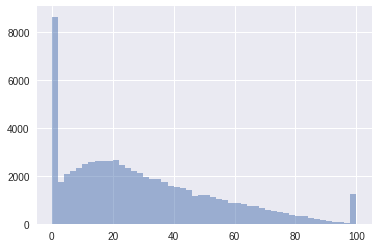

In [92]:
df['PCT_AMT_FHA'].hist(bins=50, alpha=0.5)

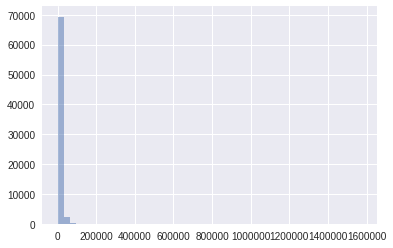

In [93]:
df['AMT_ALL'].hist(bins=50, alpha=0.5)

The above distribution looks skewed, so let's look at its logarithm.

count    72035.000000
mean         8.170124
std          1.429644
min          1.098612
25%          7.347300
50%          8.335431
75%          9.176680
max         14.270319
Name: LOG_AMT_ALL, dtype: float64


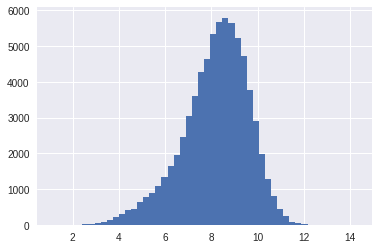

In [94]:
df['LOG_AMT_ALL'] = np.log1p(df['AMT_ALL'])  # Create a new column to examine
print df['LOG_AMT_ALL'].describe()

df['LOG_AMT_ALL'].hist(bins=50)

## Indexing data frames

Indexing by a column name yields a data series.

In [97]:
df['State_Code'].head()

0     8.0
1    28.0
2    40.0
3    39.0
4    12.0
Name: State_Code, dtype: float64

Indexing by a list of column names gives another data frame.

In [98]:
df[['State_Code', 'County_Code']].head()

,State_Code,County_Code
0,8.0,75.0
1,28.0,49.0
2,40.0,3.0
3,39.0,113.0
4,12.0,105.0


**Question:** What will this return?

In [99]:
type(df[['State_Code']])

pandas.core.frame.DataFrame

In [100]:
[42, 123]

[42, 123]

A data frame is an iterator that yields the column names:

In [101]:
[col for col in df]

['State_Code',
 'County_Code',
 'Census_Tract_Number',
 'NUM_ALL',
 'NUM_FHA',
 'PCT_NUM_FHA',
 'AMT_ALL',
 'AMT_FHA',
 'PCT_AMT_FHA',
 'GEOID',
 'LOG_AMT_ALL']

To index a particular element of the frame, use the `.loc` attribute.  It takes index and column names.

In [104]:
df.index = df.index * 10

In [110]:
df.head(5)

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
10,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
20,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278
30,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719
40,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,5.717028


In [106]:
df.loc[30, 'State_Code']

39.0

In [108]:
df.iloc[30, 0]

12.0

Both can be sliced.  Unusually for Python, both endpoints are included in the slice.

In [112]:
df.loc[0:30, 'State_Code':'Census_Tract_Number']

,State_Code,County_Code,Census_Tract_Number
0,8.0,75.0,NaN
10,28.0,49.0,103.01
20,40.0,3.0,NaN
30,39.0,113.0,603.00


Position-based indexing is available in the `.iloc` attribute.

In [113]:
df.iloc[3, 0]

39.0

The usual slicing convention is used for `.iloc`.

In [114]:
df.iloc[0:3, 0:3]

,State_Code,County_Code,Census_Tract_Number
0,8.0,75.0,NaN
10,28.0,49.0,103.01
20,40.0,3.0,NaN


In [116]:
df.loc[:30]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
10,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
20,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278
30,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719


## Indices in Pandas

Pandas indices allow us to handle data naturally.  Elements are associated based on their index, not their order.

In [118]:
s1 = pd.Series([1,2,3], index=['a', 'b', 'c'])
s2 = pd.Series([3,2,1], index=['c', 'b', 'a'])

In [122]:
s1

a    1
b    2
c    3
dtype: int64

In [120]:
s2

c    3
b    2
a    1
dtype: int64

In [123]:
s1 + s2

a    2
b    4
c    6
dtype: int64

In [124]:
s3 = pd.Series([3,2,1], index=['c', 'd', 'e'])

In [125]:
s3

c    3
d    2
e    1
dtype: int64

In [126]:
s1 + s3

a    NaN
b    NaN
c    6.0
d    NaN
e    NaN
dtype: float64

Missing values get a NaN, but this can be replaced by a fill value of your choice.

In [127]:
s1.add(s3, fill_value=0)

a    1.0
b    2.0
c    6.0
d    2.0
e    1.0
dtype: float64

## Function application and mapping

For element-wise function application, the most straightforward thing to do is to apply numpy functions to these objects:

In [141]:
df1 = pd.DataFrame(np.arange(24).reshape(4,6), index=list('abcd'), columns=list('ABCDEF'))

In [142]:
df1

,A,B,C,D,E,F
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23


In [143]:
np.sin(1)

0.8414709848078965

In [144]:
np.sin(df1)

,A,B,C,D,E,F
a,0.000000,0.841471,0.909297,0.141120,-0.756802,-0.958924
b,-0.279415,0.656987,0.989358,0.412118,-0.544021,-0.999990
c,-0.536573,0.420167,0.990607,0.650288,-0.287903,-0.961397
d,-0.750987,0.149877,0.912945,0.836656,-0.008851,-0.846220


This relies on numpy functions automatically broadcasting themselves to work element-wise.  To apply a pure-python function to each element, use the `.applymap()` method.

In [145]:
def format(x):
    return "%.2f" % x

In [146]:
format(3.1415)

'3.14'

In [147]:
df1.applymap(format)

,A,B,C,D,E,F
a,0.00,1.00,2.00,3.00,4.00,5.00
b,6.00,7.00,8.00,9.00,10.00,11.00
c,12.00,13.00,14.00,15.00,16.00,17.00
d,18.00,19.00,20.00,21.00,22.00,23.00


In [148]:
df1.applymap(lambda x: "%.2f" % x)

,A,B,C,D,E,F
a,0.00,1.00,2.00,3.00,4.00,5.00
b,6.00,7.00,8.00,9.00,10.00,11.00
c,12.00,13.00,14.00,15.00,16.00,17.00
d,18.00,19.00,20.00,21.00,22.00,23.00


However, sometimes you want to compute things column-wise or row-wise.  In this case, you will need to use the `apply` method.  For example, the following takes the range of each column.

In [149]:
df1.apply(lambda x: x.max() - x.min())

A    18
B    18
C    18
D    18
E    18
F    18
dtype: int64

In [150]:
df1.apply(lambda x: max(x) - min(x))

A    18
B    18
C    18
D    18
E    18
F    18
dtype: int64

In [139]:
min([1, 2, 4, 10])

1

And this takes the range of reach row.

In [151]:
df1.apply(lambda x: x.max() - x.min(), axis=1)

a    5
b    5
c    5
d    5
dtype: int64

## Filtering data

Now the `df[...]` notation is very flexible:
  - It accepts column names (strings and lists of strings);
  - It accepts column numbers (so long as there is no ambiguity with column names);
  - It accepts _binary data series!_
  
This means that you can write

        df[ (df['column_name2']==MD) & ( (df['column_name1']==5) | (df['column_name1']==6) ) ]
   
for what you would write in SQL as

>         SELECT * FROM df WHERE
            column_name2='MD" AND (column_name1=5 OR column_name1=6)
            
Boolean operators on a data frame return a data series of bools.

In [156]:
df.head(15)

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0,NaN,5.556828
10,28.0,49.0,103.01,1,1,100.0,71,71,100.0,2.804901e+10,4.276666
20,40.0,3.0,NaN,1,1,100.0,215,215,100.0,NaN,5.375278
30,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719
40,12.0,105.0,124.04,2,2,100.0,303,303,100.0,1.210501e+10,5.717028
50,12.0,86.0,9808.00,1,1,100.0,188,188,100.0,1.208698e+10,5.241747
60,39.0,35.0,1202.00,1,1,100.0,19,19,100.0,3.903512e+10,2.995732
70,12.0,103.0,207.00,2,2,100.0,100,100,100.0,1.210302e+10,4.615121
80,36.0,119.0,30.00,1,1,100.0,354,354,100.0,3.611900e+10,5.872118
90,39.0,153.0,NaN,1,1,100.0,213,213,100.0,NaN,5.365976


In [160]:
(df['State_Code'] == 39).head()

0     False
10    False
20    False
30     True
40    False
Name: State_Code, dtype: bool

In [161]:
df[df['State_Code'] == 39].head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
30,39.0,113.0,603.00,3,3,100.0,206,206,100.0,3.911306e+10,5.332719
60,39.0,35.0,1202.00,1,1,100.0,19,19,100.0,3.903512e+10,2.995732
90,39.0,153.0,NaN,1,1,100.0,213,213,100.0,NaN,5.365976
180,39.0,35.0,1015.01,2,2,100.0,145,145,100.0,3.903510e+10,4.983607
240,39.0,35.0,1526.03,2,2,100.0,92,92,100.0,3.903515e+10,4.532599


In [164]:
((df['State_Code'] == 39) & (df['Census_Tract_Number'] == 9613)).head()

0     False
10    False
20    False
30    False
40    False
dtype: bool

In [165]:
df[(df['State_Code'] == 39) & (df['Census_Tract_Number'] == 9613)]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
519580,39.0,143.0,9613.0,21,2,9.52381,2110,262,12.41710,3.914396e+10,7.654917
573400,39.0,31.0,9613.0,21,2,9.52381,2533,203,8.01421,3.903196e+10,7.837554


In [167]:
df[(df['State_Code'] == 39) & (df['Census_Tract_Number'] == 9613)]

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
519580,39.0,143.0,9613.0,21,2,9.52381,2110,262,12.41710,3.914396e+10,7.654917
573400,39.0,31.0,9613.0,21,2,9.52381,2533,203,8.01421,3.903196e+10,7.837554


In [172]:
df.query('State_Code == 39 and Census_Tract_Number == 9613')

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
519580,39.0,143.0,9613.0,21,2,9.52381,2110,262,12.41710,3.914396e+10,7.654917
573400,39.0,31.0,9613.0,21,2,9.52381,2533,203,8.01421,3.903196e+10,7.837554


**Note:** selecting rows by binary data series only if they share the same data index!

**Exercise:**
1. Plot the histogram of percentages for different states in the same graph to compare them.
2. Notice that there is a spike at 100%.  This means that the FHA has insured 100% of the houses in that census tract.  See what happens to the histogram when we restrict it to the case where the total number of loans is non-negligible.

## Joining data

The analogue of a

>             
    SELECT * 
        FROM df1
        INNER JOIN df2 
        ON df1.field_name=df2.field_name;

is

    df_joined = df1.merge(df2, on='field_name')

You can also do left / right / outer joins, mix-and-match column names, etc.  For that consult the Pandas documentation. (The example below will do a left join.)

Of course, just looking at the distribution of insurance by census tract isn't interesting unless we know more about the census tract.

In [ ]:
# The first row is the column names, so we don't have to specify those
df_geo = pd.read_csv('small_data/2013_Gaz_tracts_national.tsv', sep='\t')
df_geo.head()

In [ ]:
df_joined = df.merge(df_geo, on='GEOID', how='left')
df_joined.head()

## Aggregating data

The analog of SQL's `GROUP BY` is

    grouped = df.groupby(['field_name1', ...])...

The above is analogous to
>             
    SELECT mean(df.value1), std(df.value2) 
        FROM df
        GROUP BY df.field_name1, ...

Pandas is somewhat more flexible in how you can use grouping, not requiring you to specify an aggregation function up front.  The `.groupby()` method that can later be aggregated.

In [ ]:
usps_groups = df_joined.groupby('USPS')
usps_groups

The reason Pandas doesn't require you to specify an aggregation function up front is because the groupby method by itself does little work. It returns a `DataFrameGroupBy` datatype that contains a dictionary of group keys to lists of row numbers.

In [ ]:
print type(usps_groups.groups)
usps_groups.groups['AK'][:5]

We can retrieve the group of data associated with one key:

In [ ]:
usps_groups.get_group('AK').head()

Observe that this is the same as:

In [ ]:
df_joined.iloc[usps_groups.groups['AK'][:5]]

In [ ]:
usps_groups.mean().head()  # Takes the mean of the rows in each group

In [ ]:
# This is the analog of
# SELECT USPS, SUM(AMT_FHA), SUM(AMT_ALL), ... FROM df GROUP BY USPS;
df_by_state = usps_groups['AMT_FHA', 'AMT_ALL', 'NUM_FHA', 'NUM_ALL'].sum()
df_by_state.head()

In [ ]:
df_by_state['PCT_AMT_FHA'] = 100.0 * df_by_state['AMT_FHA']  / df_by_state['AMT_ALL']

# This sure looks different than the census-tract level histogram!
df_by_state['PCT_AMT_FHA'].hist(bins=20)

You can also specify a specific aggregation function per column:

In [ ]:
usps_groups['NUM_FHA', 'NUM_ALL'].agg({'NUM_FHA': np.sum,
                                       'NUM_ALL': np.mean}).head()

The groupby function is especially useful when you define your own aggregation functions. Here, we define a function that returns the row for the census track located farthest to the north. The apply function attempts to 'combine results together in an intelligent way.' The list of Series objects from each call to `farthest_north` for each USPS code is collapsed into a single DataFrame table.

In [ ]:
def farthest_north(state_df):
    # descending sort, then select row 0
    # the datatype will be a pandas Series
    return state_df.sort_values('INTPTLAT', ascending=False).iloc[0]

df_joined.groupby('USPS').apply(farthest_north)[:10]

## Sorting by indices and columns

We can sort by the row (or column) index.

In [ ]:
df_by_state.sort_index(ascending=False).head()

We can also sort by the value in a column:

In [ ]:
df_by_state.sort_values('AMT_FHA').head()

### Pandas HTML data import example

Pandas takes a "batteries included" approach and throws in a whole lot of convenience functions.  For instance it has import functions for a variety of formats.  One of the pleasant surprises is a command `read_html` that's meant to automate the process of extracting tabular data from HTML.  In particular, it works pretty well with tables on Wikipedia.  

Let's do an example: We'll try to extract the list of the world's tallest structures from
http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world.

In [ ]:
dfs = pd.read_html('http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world', header=0, parse_dates=False)

# There are several tables on the page.  By inspection we can figure out which one we want
tallest = dfs[2]

# The coordinates column needs to be fixed up.  This is a bit of string parsing:
def clean_lat_long(s):
    try:
        parts = s.split("/")
    except AttributeError:
        return (None, None)
    if len(parts) < 3:
        return (None, None)
    m = re.search(r"(\d+[.]\d+);[^\d]*(\d+[.]\d+)[^\d]", parts[2])
    if not m:
        return (None, None)
    return (m.group(1), m.group(2))

tallest['Clean_Coordinates'] = tallest['Coordinates'].apply(clean_lat_long)
tallest['Latitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[0])
tallest['Longitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[1])

# Et voila
tallest.head()

**Exercise**

1. Parse the table rankings of [UK universities available on Wikipedia](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom)

## Pandas Timestamps

Pandas comes with excellent tools for managing temporal data. Central to this is the Timestamp class, which can infer timestamps from many sensible inputs:

In [ ]:
print pd.Timestamp('July 4, 2016')
print pd.Timestamp('Monday, July 4, 2016')
print pd.Timestamp('Tuesday, July 4th, 2016')  # notice it ignored 'Tuesday'
print pd.Timestamp('Monday, July 4th, 2016 05:00 PM')
print pd.Timestamp('07/04/2016T17:20:13.123456')
print pd.Timestamp(1467651600000000000)  # number of ns since the epoch, 1/1/1970

It can manage timestamps with timezones:

In [ ]:
july4 = pd.Timestamp('Monday, July 4th, 2016 05:00 PM').tz_localize('US/Eastern')
labor_day = pd.Timestamp('9/5/2016 12:00', tz='US/Eastern')
thanksgiving = pd.Timestamp('11/24/2016 16:00')  # no timezone

Pandas can do calculations on Timestamps if they are both localized to the same timezone or neither has a timezone.

In [ ]:
print labor_day - july4
# print thanksgiving - july4  # generates an error

The time series offsets are useful for calculating dates relative to another date. Observe it skips over weekend days but is oblivious to holidays. Pandas does support [Custom Calendars](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#holidays-holiday-calendars) if you need them.

In [ ]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print july4 + Day(5)  # 5 calendar days later, a Saturday.
print july4 + BDay(5)  # 5 business days later, or the following Monday.
print july4 - BDay(1)  # 1 business day earlier, or the previous Friday.
print july4 + BMonthEnd(1)  # last business day of the month.

Pandas can generate a range of dates. Here, we generate a list of business days in January of 2016:

In [ ]:
business_days = pd.date_range('1/1/2016', '1/31/2016', freq='B')
business_days

This can in turn be used in as a DataFrame index:

In [ ]:
time_df = DataFrame(np.random.rand(len(business_days)),
                    index=business_days,
                   columns=['random'])
time_df.head()

The same timezone functions are still available.

In [ ]:
time_df.tz_localize('UTC').tz_convert('US/Pacific').head()

## DataFrame Resampling

Pandas DataFrames provide a resampling method for changing the frequency of your data. Perhaps you have daily data but only care about the last data-point in each month. You can resample to downgrade the the data to a different frequency.

In [ ]:
year2016 = pd.date_range(start='1/1/2016', end='12/31/2016')

daily_data_df = DataFrame(np.random.rand(len(year2016)), index=year2016, columns=['random'])
daily_data_df.head()

This makes a new DataFrame with each data-point coming from the last day of the month.

In [ ]:
monthly_data = daily_data_df.resample('1M').last()
monthly_data

What about resampling in the other direction? This is possible, but you may have gaps in the result. To avoid this, use the `ffill` and `bfill` methods, like so.

In [ ]:
daily_data2 = monthly_data.resample('1D').bfill()
daily_data2.head()

You'll also notice that the first date in that DataFrame is 2016-01-31, not 2016-01-01 like in the original list. We can fix that if we want to. The `loc[year2016]` code fixes the index and the `bfill()` fills in the January values.

In [ ]:
daily_data3 = daily_data2.loc[year2016].bfill()
daily_data3.head()

## A little bit more on `read_csv`

We've already used the Pandas `read_csv` method a few times in this notebook, but let's take a closer look at what it can do. It is a powerful tool for inputting a wide variety of delimited text files and overcoming many typical data input problems. Because CSV files are so popular, over time many features were added and now it can handle pretty much any CSV file you are likely to find.

You can access the `read_csv` documentation to read about all of the parameters, but here are the most useful ones.

* sep: Change the file delimiter. By default it is a comma, but you will find files that use tabs ('\t') and pipes. ('|')
* header: Row number to use for column header. Some csv files have no header; in this case, pass None instead and use the names parameter.
* names: List of column names to use, overriding what `read_csv` might name the columns from reading the file.
* index_col: Make an index out of a column. Without this, it will create a default index of integers.
* parse_dates: parse certain columns as dates.
* infer_datetime_format: if the data in a column of dates all have the same format, this will speed up reading the file.

## DataFrames and Iterators

Often you will need to loop through data in a DataFrame. Rather than use a `for` loop, you can convert a DataFrame into an iterator of your choosing.

The `iterrows` method creates an iterator that returns tuples of the index value and its row of data as a Pandas Series.

In [ ]:
list(daily_data_df.iterrows())[0]

The `iteritems` method is similar except it iterates over columns, not rows.

In [ ]:
list(daily_data_df.iteritems())[0]

Finally, `itertuples`. This method returns each row as a tuple. Including the index value in that tuple is optional.

In [ ]:
list(daily_data_df.itertuples(index=True, name=None))[0]

### Exercises

1. Find a CSV file somewhere on the Internet that contains data that interests you. Open the file with the Pandas `read_csv` function and plot the data.
1. Aggregate the data in a meaningful way and plot the results.
1. Create a Pandas Timestamp for the day you were born and for today's date. How many days old are you? Seconds? Milliseconds?

### Exit Tickets

1. What is a Pandas DataFrame?
1. What is a DataFrame index? How does it differ from a regular DataFrame column?
1. What is DataFrame aggregation? 

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*